# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)


combined_df = pd.merge(study_df, mouse_df, how="left") #original
#combined_df = pd.merge(mouse_df, study_df, how="outer")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_df = combined_df.groupby(['Mouse ID'])['Timepoint']


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = pd.DataFrame(combined_df[combined_df.duplicated(['Mouse ID','Timepoint'],keep='first')])
dups['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
all_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(['Mouse ID','Timepoint'])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
#set drug regimen to the index of the clean dataframe
clean_df = clean_df.set_index(['Drug Regimen'])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.0,0,Female,9,22
Ketapril,f932,0,45.0,0,Male,15,29
Ketapril,g107,0,45.0,0,Female,2,29
Ketapril,a457,0,45.0,0,Female,11,30
Ketapril,c819,0,45.0,0,Male,21,25


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_group = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

clean_group_df = pd.DataFrame({
                              'Mean Tumor Volume':clean_group.mean(),
                              'Median Tumor Volume':clean_group.median(),
                              'Tumor Volume Variance':clean_group.var(),
                              'Tumor Volume STD':clean_group.std(),
                              'Tumor Volume Std. Error':clean_group.sem()
                              })

clean_group_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats_median

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

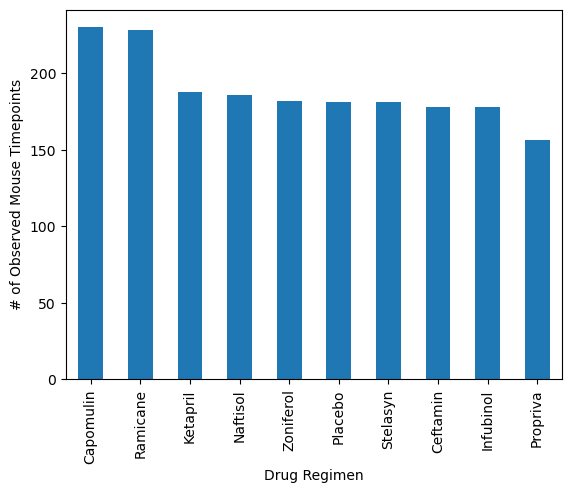

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_df = pd.DataFrame(clean_df.groupby('Drug Regimen')['Mouse ID'].count()).sort_values(by='Mouse ID',ascending=False)


drug_regimen_df.plot(kind='bar',ylabel='# of Observed Mouse Timepoints',legend=None)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

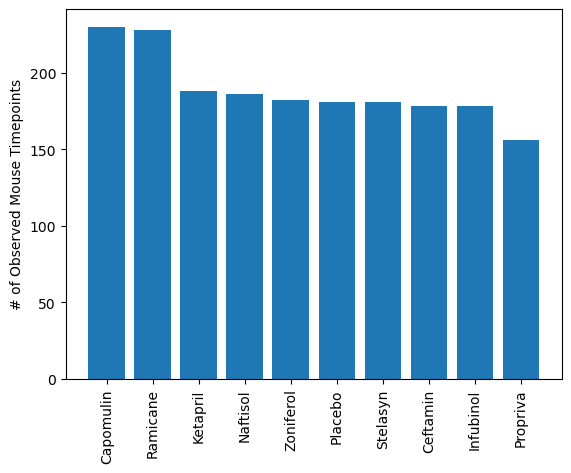

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_df.index, drug_regimen_df['Mouse ID'])
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

<Axes: ylabel='Sex'>

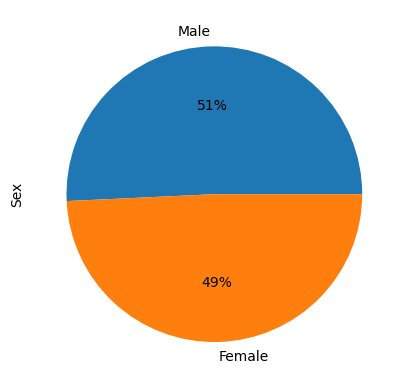

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df['Sex'].value_counts().plot(kind='pie',autopct='%.f%%',ylabel='Sex')


Text(0, 0.5, 'Sex')

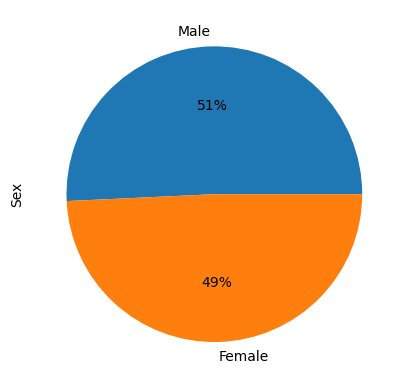

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
plt.pie(clean_df['Sex'].value_counts(),autopct='%.f%%',labels=labels)
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [14]:
#create a grouped dataframe that shows the last/greatest time point for each mouse and reset index
greatest = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max()).reset_index()
greatest = greatest.rename(columns={'Timepoint': 'Last'})


In [15]:
#merge the dataframe that shows the last/greatest time point for each mouse with original clean dataframe
clean_df.reset_index(inplace=True)
all_df = pd.merge(clean_df,greatest,on='Mouse ID',how='outer')
all_df.head(20)

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Last
0,Capomulin,b128,0,45.000000,0,Female,9,22,45
1,Capomulin,b128,5,45.651331,0,Female,9,22,45
2,Capomulin,b128,10,43.270852,0,Female,9,22,45
3,Capomulin,b128,15,43.784893,0,Female,9,22,45
4,Capomulin,b128,20,42.731552,0,Female,9,22,45
5,Capomulin,b128,25,43.262145,1,Female,9,22,45
6,Capomulin,b128,30,40.605335,1,Female,9,22,45
7,Capomulin,b128,35,37.967644,1,Female,9,22,45
8,Capomulin,b128,40,38.379726,2,Female,9,22,45
9,Capomulin,b128,45,38.982878,2,Female,9,22,45


In [16]:
#create a list to hold treatment names
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

#empty list to fill with tumor vol data (for plotting)
#each empty list has an index that matches treatments
tumor_volume =[]

#looping through the list via index instead of by the name
for x in range(len(treatments)):
    
    #add tumor volume data to the list
    tumor_volume.append(all_df.loc[(all_df['Timepoint'] ==all_df['Last']) & \
                                      (all_df['Drug Regimen'] == treatments[x]),['Tumor Volume (mm3)']])
        
#create lists
upper_bound = []
lower_bound  = []
outliers = []

tumor_volume1 = np.array(tumor_volume)

#loop through the treatment list to complete calculations
for x in range(len(treatments)):
           
    #calculate quartiles and IQR
    first_quartile = np.quantile(tumor_volume[x],0.25)
    third_quartile = np.quantile(tumor_volume[x],0.75)
    iqr = third_quartile - first_quartile
    
    #determine if there are any potential outliers 
    upper_bound.append(third_quartile + (1.5 * iqr))
    lower_bound.append(first_quartile - (1.5 * iqr))
    
    #calculate outliers
    outliers = tumor_volume1[x][(tumor_volume[x] < lower_bound[x]) | (tumor_volume1[x] > upper_bound[x])]
    
    #print potential outliers
    print(f"{treatments[x]}'s potential outliers are: {outliers}")

        

Capomulin's potential outliers are: []
Ramicane's potential outliers are: []
Infubinol's potential outliers are: [36.3213458]
Ceftamin's potential outliers are: []


Text(0, 0.5, 'Final Tumor Volume (mm3)')

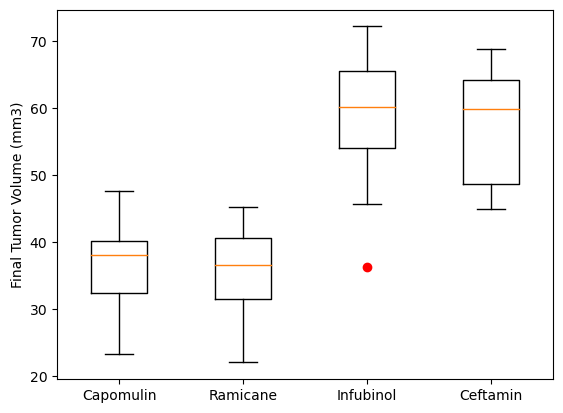

In [17]:
#create dataframes to get the last timepoint for each mouse for Capomulin, Ramicane, Infubinol and Ceftamin 

Capomulin = pd.DataFrame(all_df.loc[(all_df['Drug Regimen'] == 'Capomulin') & \
                         (all_df['Timepoint'] == all_df['Last']), ['Tumor Volume (mm3)']])


Ramicane = pd.DataFrame(all_df.loc[(all_df['Drug Regimen'] == 'Ramicane') & \
                         (all_df['Timepoint'] == all_df['Last']), ['Tumor Volume (mm3)']])


Infubinol = pd.DataFrame(all_df.loc[(all_df['Drug Regimen'] == 'Infubinol') & \
                         (all_df['Timepoint'] == all_df['Last']), ['Tumor Volume (mm3)']])


Ceftamin = pd.DataFrame(all_df.loc[(all_df['Drug Regimen'] == 'Ceftamin') & \
                         (all_df['Timepoint'] == all_df['Last']), ['Tumor Volume (mm3)']])

#convert drug dataframes to lists so that they can be plotted
ca_list = Capomulin['Tumor Volume (mm3)'].values.tolist()
ra_list = Ramicane['Tumor Volume (mm3)'].values.tolist()
in_list = Infubinol['Tumor Volume (mm3)'].values.tolist()
ce_list = Ceftamin['Tumor Volume (mm3)'].values.tolist()

#plot box plot of final tumor volumes for each of the four most promising drugs
plt.boxplot([ca_list,ra_list,in_list,ce_list],labels=treatments, sym='ro')
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

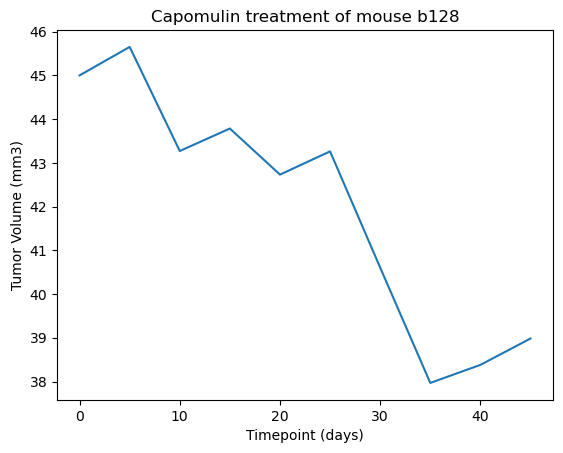

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
data = clean_df.loc[clean_df['Mouse ID'] == 'b128']
data = data[['Timepoint','Mouse ID','Tumor Volume (mm3)']]

#plot line chart
plt.plot(data['Timepoint'],data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

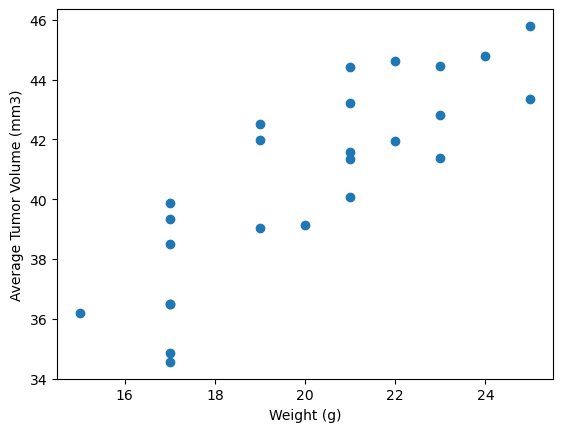

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
entire_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
weight_avg = entire_df.groupby('Mouse ID')['Weight (g)'].mean()
tumor_avg = entire_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#plot scatter chart
plt.scatter(weight_avg,tumor_avg)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

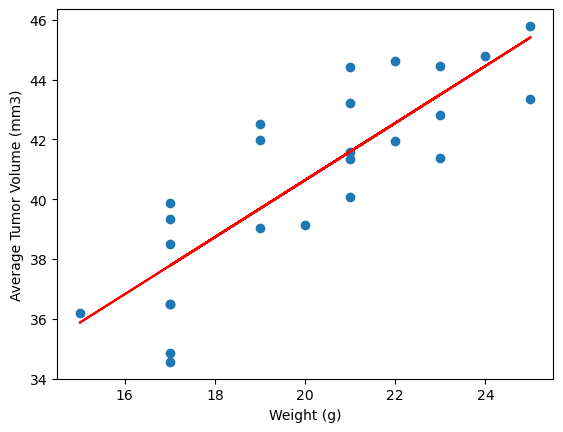

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_avg = entire_df.groupby('Mouse ID')['Weight (g)'].mean()
tumor_avg = entire_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#plot scatter plot
plt.scatter(weight_avg,tumor_avg)
(slope,intercept,rvalue,pvalue,stderr) =linregress(weight_avg,tumor_avg)

#linear regression model
regress_values =weight_avg * slope + intercept

#plot linear regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight_avg,regress_values,"r-")

#calculate correlation
correlation = st.pearsonr(weight_avg, tumor_avg)

#add labels to the chart
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
